# Part II - Prosper Loan Data Analysis
## by Amanuel Loeta

## Investigation Overview

In this investigation, My Key insights for the presentation is what is mainly affects borrower interest rate, what status of borrower would affect the loan status, debt to income ratio, and prosper score.
I have explored it step by step starting from exploring each variablens alone and finding the coorelation with other variables.



## Dataset Overview

This prosper loan data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
On the data set I have made some wrangling on Listing Catagory columns to change from numeric value to String, which made simple for plotting.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
# Below function will get a numeric value and return a string value for each key.
def replace_numeric(numeric):
    num_list = {0:'Not Available', 1:'Debt Consolidation',2:'Home Improvement',
                 3:'Business',4:'Personal Loan',5:'Student Use',6:'Auto',7:'Other',
                 8:'Baby&Adoption',9:'Boat',10:'Cosmetic Procedure',
                 11:'Engagement Ring',12:'Green Loans',13:'Household Expenses',
                 14:'Large Purchases',15:'Medical/Dental',16:'Motorcycle',17:'RV',
                 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}
    return num_list[numeric]
# Creating a column and Replacing our ListingCategory numeric value to string
df['ListingCategory'] = df['ListingCategory (numeric)'].apply(replace_numeric)
# Dropping Numeric Column
df.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

# Univariate exploration

## Distribution of Borrowers Loan Status

Loan Status shows us the current status of the loan. The distribution loan status is mostly found on Current and secondly on Completed. This shows us most borrowers loan is status are still ongoing, they haven't completed their loan. And also we can see that there are also very little borrowers have passed their due date.

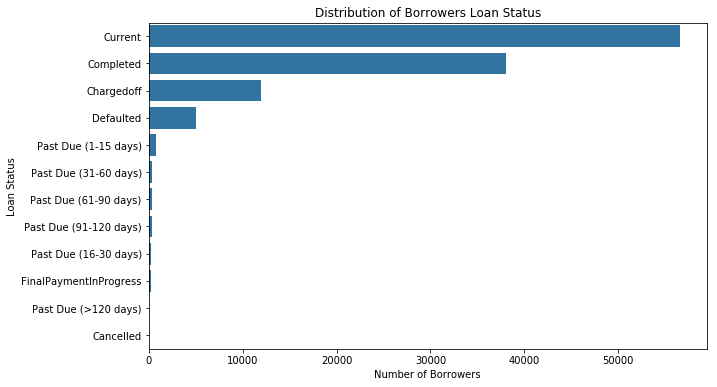

In [5]:
loan_status = df.LoanStatus.value_counts()
fig = plt.figure(figsize=(10,6))
default_color = sb.color_palette()[0]
sb.countplot(y='LoanStatus', data=df, order=loan_status.index, color = default_color)
plt.title('Distribution of Borrowers Loan Status')
plt.ylabel('Loan Status')
plt.xlabel('Number of Borrowers')
plt.show()

## Distribution of Causes for a Loan

The category of the listing that the borrower selected when posting their listing. Debt consolidation holds the main cause followed by home improvement and business. And also as we can see some of the causes are not listed so they are stated as Not Availabe.

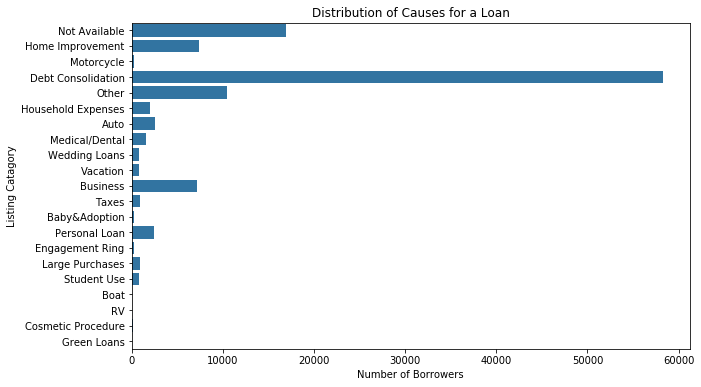

In [8]:
fig = plt.figure(figsize=(10,6))
sb.countplot(y='ListingCategory', data=df, color = default_color)
plt.title('Distribution of Causes for a Loan')
plt.ylabel('Listing Catagory')
plt.xlabel('Number of Borrowers')
plt.show()

## Distribution of Borrower's Interest Rate

The Borrower's interest rate for this loan. The distribution of Interest Rate for the borrowers are between 5% and 35%. We will see later by which features this interest rate will be affected and thier coorelation.

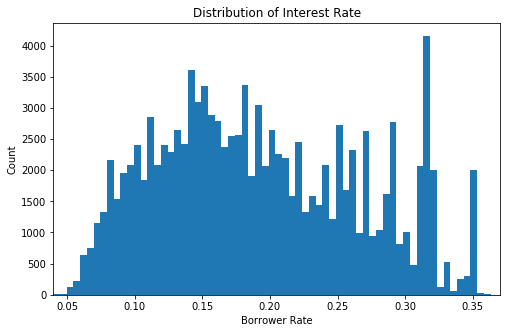

In [9]:
#plotting Distribution of Interest Rate
plt.figure(figsize=[8, 5])
plt.hist(data=df, x = 'BorrowerRate', bins = 100)
plt.xlim([0.04,0.37])
plt.title('Distribution of Interest Rate')
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.show()

# Bivariate exploration

## Borrower's Monthly Income vs. DebtToIncomeRatio

From the realtion of monthly income and debt to income ratio, we can see how the borrower's monthly income affect debt to income ratio. Form borrower's monthly income and DebtToIncomeRatio relationship plot we can see that there high DebtToIncomeRatio distrubtion for whose monthly income is lessthan 1000. We can conclude that the borrowers which have very less income have high DebtToIncomeRatio.

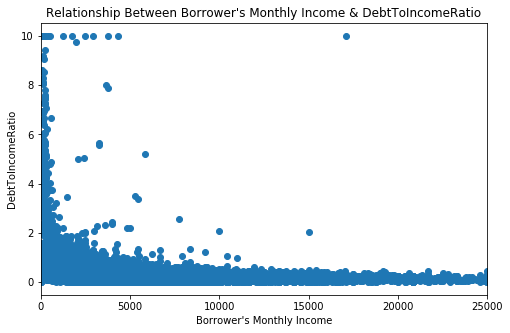

In [10]:
#Plotting relations between StatedMonthlyIncome and DebtToIncomeRatio
plt.figure(figsize=[8, 5])
plt.scatter(data=df, x = 'StatedMonthlyIncome', y = 'DebtToIncomeRatio')
plt.xlim([0,25000])
plt.title("Relationship Between Borrower's Monthly Income & DebtToIncomeRatio")
plt.ylabel('DebtToIncomeRatio')
plt.xlabel("Borrower's Monthly Income")
plt.show()

## Interest Rate vs. Prosper Score

In this relation we will see how borrower interest rate affects a prosper score. We can see that Borrower Rate and Prosper Score have high coorelation between them. They have a negative coorelation as we see when the prosper score increases borrowers interest rate decreases.

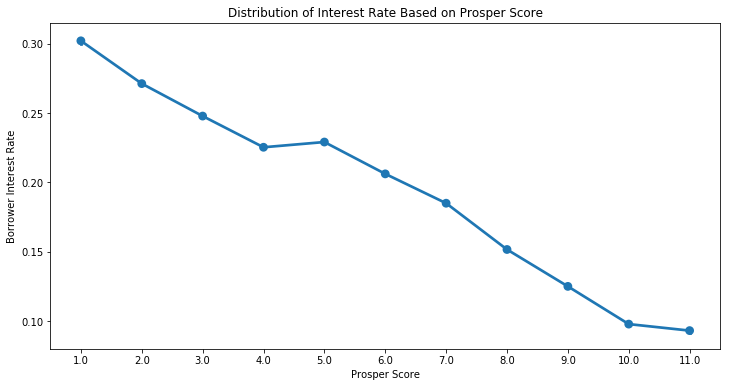

In [11]:
#Plotting relations between ProsperScore and BorrowerRate
fig = plt.figure(figsize=(12,6))
sb.pointplot(y='BorrowerRate', x='ProsperScore', data=df)
plt.title('Distribution of Interest Rate Based on Prosper Score')
plt.ylabel('Borrower Interest Rate')
plt.xlabel('Prosper Score')
plt.show()

# Multivariate exploration

## Prosper Score and Borrower Rate by Loan Status and Home owner

In this multivariate realtions we can see that some how the prosper score is decreasing when the borrower rate is increasing. And also there is a high distribution on Completed and Current loan status. Since this Loan status are selected from other because of their high distribution than others. There is no difference of the distribution between home owners and non-home owners.

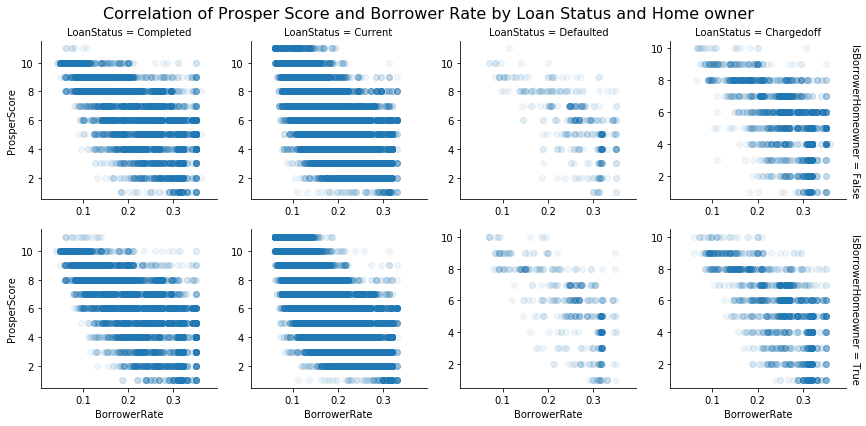

In [12]:
# scatter plot for borrowerrate, prosper score, by isborrowerhomeowner and loan status
g = sb.FacetGrid(data = df, row = 'IsBorrowerHomeowner', col = 'LoanStatus', 
                 col_order = ['Completed', 'Current', 'Defaulted', 'Chargedoff'], margin_titles = True, sharey = False)
g.map(plt.scatter, 'BorrowerRate', 'ProsperScore', alpha = 1/15)

g.fig.suptitle('Correlation of Prosper Score and Borrower Rate by Loan Status and Home owner', size = 16)
g.fig.subplots_adjust(top = .9);

In [ ]:
!jupyter nbconvert Part_II_Prosper_Loan_Data_exploration.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Prosper_Loan_Data_exploration.ipynb to slides
[NbConvertApp] Writing 552307 bytes to Part_II_Prosper_Loan_Data_exploration.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Prosper_Loan_Data_exploration.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/us